In [1]:
import torch
import torch.nn.functional as F 
import torch.optim as optim
import matplotlib.pyplot as plt
import utils
import models
from torchsummary import summary
from tqdm import tqdm

In [2]:

has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"


In [3]:
#torch.manual_seed(42)

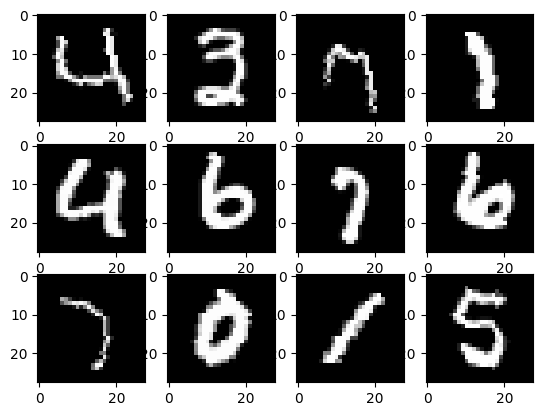

In [4]:

batch_images, batch_labels = next(iter(utils.train_loader))

# Print 12 images to see the sample data
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(batch_images[i].squeeze(0), cmap  = 'gray')


In [5]:

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
 
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    #print('Printing batch id -->' + str(batch_idx))
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))


In [6]:
model = models.model7().to(device)

In [7]:

optimizer = optim.SGD(params = model.parameters(), lr = 0.1, momentum= 0.9)
step_sizes = 10  # Adjust the learning rate after 10, 20, and 30 epochs
gamma = 0.1  # The factor by which the learning rate will be reduced

scheduler = optim.lr_scheduler.StepLR(optimizer, step_sizes, gamma=gamma, verbose=True)
# New Line
num_epochs = 15

   
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, utils.train_loader, optimizer)
    test(model, device, utils.test_loader)
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Loss=0.04723595827817917 Batch_id=468 Accuracy=93.51: 100%|██████████| 469/469 [00:06<00:00, 68.40it/s] 



Test set: Average loss: 0.0435, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Loss=0.044146351516246796 Batch_id=468 Accuracy=97.55: 100%|██████████| 469/469 [00:06<00:00, 73.69it/s]



Test set: Average loss: 0.0302, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Loss=0.1504325568675995 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:06<00:00, 73.78it/s]  



Test set: Average loss: 0.0319, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Loss=0.03093433752655983 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:06<00:00, 73.84it/s] 



Test set: Average loss: 0.0258, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Loss=0.06966983526945114 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:06<00:00, 74.50it/s]  



Test set: Average loss: 0.0246, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Loss=0.07087104022502899 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:06<00:00, 74.59it/s] 



Test set: Average loss: 0.0265, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7


Loss=0.046244971454143524 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:06<00:00, 74.63it/s] 



Test set: Average loss: 0.0207, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8


Loss=0.03603249415755272 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:06<00:00, 74.05it/s]  



Test set: Average loss: 0.0241, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9


Loss=0.015724532306194305 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:06<00:00, 74.21it/s] 



Test set: Average loss: 0.0196, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10


Loss=0.14643386006355286 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:06<00:00, 74.54it/s]  



Test set: Average loss: 0.0251, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Loss=0.04677274078130722 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:06<00:00, 73.73it/s]  



Test set: Average loss: 0.0182, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Loss=0.006222289055585861 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:06<00:00, 74.46it/s] 



Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Loss=0.04643501341342926 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:06<00:00, 72.06it/s]  



Test set: Average loss: 0.0168, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Loss=0.012080283835530281 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:06<00:00, 73.53it/s] 



Test set: Average loss: 0.0162, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Loss=0.025315746665000916 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:06<00:00, 73.67it/s] 



Test set: Average loss: 0.0163, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-02.


In [8]:
device

'mps'

In [10]:
model = models.model7()
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,152
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
         Dropout2d-8           [-1, 16, 28, 28]               0
         MaxPool2d-9           [-1, 16, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             160
             ReLU-11           [-1, 10, 14, 14]               0
      BatchNorm2d-12           [-1, 10, 14, 14]              20
        Dropout2d-13           [-1, 10, 14, 14]               0
           Conv2d-14           [-1, 20,